In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install modAL

In [ ]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 778kB 7.6MB/s 
     |████████████████████████████████| 1.1MB 41.0MB/s 
     |████████████████████████████████| 3.0MB 43.7MB/s 
     |████████████████████████████████| 890kB 44.0MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.3-cp36-none-any.whl size=97299 sha256=f8b17d0fa175d7c31202c361948612021902feb600251ba1d5d38fb0d4c1bd4f
  Stored in directory: /root/.cache/pip/wheels/75/d6/0a/cab163b21d0597cc1580bc344487b11ad405e0d1d314725f2b
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=a7fa0266ca172617196d29cf94dbd91413d990b4d71b10852dc6a29dba77f2d6
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


# Pool Based

In [ ]:
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
model = SentenceTransformer('bert-base-nli-mean-tokens')
pd.options.display.max_colwidth = 200
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
# imports
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics


import pandas as pd

import plotly
import plotly.graph_objects as go


import numpy as np

In [ ]:
df = pd.read_csv('imdb_labelled.txt', sep='\t', names=['data','target'])


In [ ]:
df.head(2)

,data,target
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    748 non-null    object
 1   target  748 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [ ]:
sentence_embeddings = model.encode(df['data'].tolist())
df['embedding'] = sentence_embeddings.tolist()


In [ ]:
df.head(1)

,data,target,embedding
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,"[-0.09290046244859695, 0.4738374650478363, 1.1881862878799438, 0.5641986727714539, -0.09026540815830231, -0.544205904006958, 0.7153156399726868, 0.08246783912181854, 0.7565935254096985, 0.12556441..."


In [ ]:
x_raw = np.array(df['embedding'].tolist())
y_raw = np.array(df['target'].tolist())

In [ ]:
print(x_raw.shape)
print(y_raw.shape)

(748, 768)
(748,)


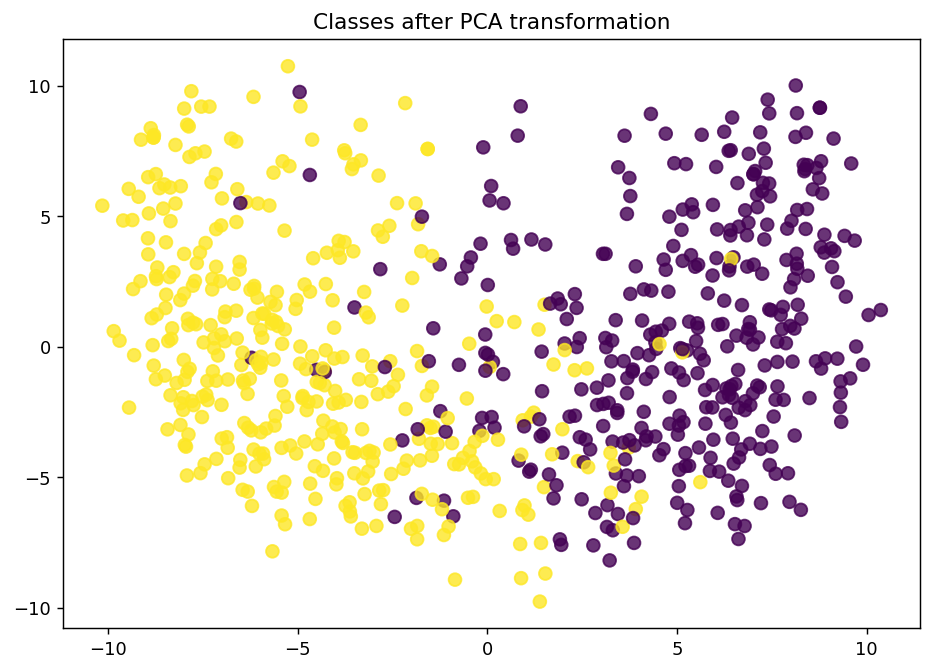

In [ ]:
# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_data = pca.fit_transform(X=x_raw)

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_data[:, 0], transformed_data[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=y_raw, cmap='viridis', s=50, alpha=8/10)
plt.title('Classes after PCA transformation')
plt.show()

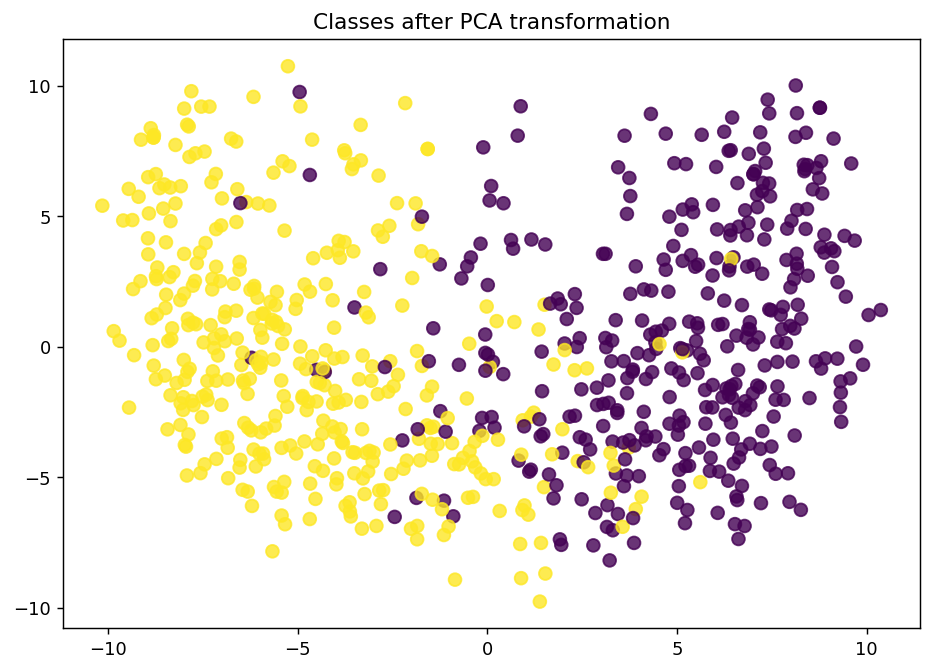

In [ ]:
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_data_new = pca.fit_transform(X=np.array(df['embedding'].tolist()))
# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=transformed_data_new[:,0], y=transformed_data_new[:,1], c=y_raw, cmap='viridis', s=50, alpha=8/10)
plt.title('Classes after PCA transformation')
plt.show()

In [ ]:
pca_plot_df = pd.DataFrame(transformed_data_new, columns=[0,1])
pca_plot_df['label'] = df['target']

In [ ]:
 fig = go.Figure(data=go.Scatter(x=pca_plot_df[0],
                                y=pca_plot_df[1],
                                hovertemplate="%{text}<br><extra></extra>",
                                marker=dict(
                                    color=pca_plot_df['label'],
                                    colorbar=dict(title="Classification"),
                                    colorscale='RdBu',
                                    opacity=0.5
                                ),
                                    mode='markers')
)
fig.show()

In [ ]:
def get_tsne_plot(df):
    tsne = TSNE(n_components=2, init='random', random_state =10, perplexity=50)
    tsne_ = tsne.fit_transform(df['embedding'].tolist())
    tsne_plot_df = pd.DataFrame(tsne_, columns=[0,1])
    tsne_plot_df['label'] = df['target']
    tsne_plot_df['text'] = df['data']
    tsne_plot_df['color'] = df['target']
    return tsne_plot_df

def get_pca_plot(df):
    pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
    transformed_data = pca.fit_transform(X=np.array(df['embedding'].tolist()))
    pca_plot_df = pd.DataFrame(transformed_data, columns=[0,1])
    pca_plot_df['label'] = df['target']
    pca_plot_df['text'] = df['data']
    pca_plot_df['color'] = df['target']
    return pca_plot_df

def plot_graph(plot_df):
    fig = go.Figure(data=go.Scatter(x=plot_df[0],
                                    y=plot_df[1],
                                    text=plot_df['text'],
                                    hovertemplate="%{text}<br><extra></extra>",
                                    marker=dict(
                                        color=plot_df['color'],
                                        colorbar=dict(title="Classification"),
                                        colorscale='RdBu',
                                        opacity=0.5
                                    ),
                                    mode='markers'))
    fig.update_traces(textposition='top center')
    fig.show()

In [ ]:
tsne_plot_df = get_tsne_plot(df)
plot_graph(tsne_plot_df)

In [ ]:
pca_plot_df = get_pca_plot(df)
plot_graph(pca_plot_df)

In [ ]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = x_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=2)
training_indices

array([510, 365])

In [ ]:
training_indices = [1,600]

In [ ]:
print(df.iloc[training_indices[0]]['target'])
print(df.iloc[training_indices[1]]['target'])

0
1


In [ ]:
x_train = x_raw[training_indices]
y_train = y_raw[training_indices]

# Isolate the non-training examples we'll be querying.
x_pool = np.delete(x_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

In [ ]:
print('raw', x_raw.shape)
print('pool', x_pool.shape)

raw (748, 768)
pool (746, 768)


In [ ]:
y_train

array([0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner
import matplotlib as mpl

# Specify our core estimator along with it's active learning model.
knn = KNeighborsClassifier(n_neighbors=10)
learner = ActiveLearner(estimator=knn, X_training=x_train, y_training=y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from modAL.models import ActiveLearner
import matplotlib as mpl

logistic_regression = LogisticRegression(random_state=0)
learner = ActiveLearner(estimator=logistic_regression, X_training=x_train, y_training=y_train)



In [ ]:
from modAL.models import ActiveLearner
import matplotlib as mpl

def create_model_architecture():
    input_size = 768
    model = models.Sequential()
    model.add(Input(input_size,))
    model.add(layers.Dense(100, activation="relu"))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(20, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def train_model(classifier, feature_vector_train, label, feature_vector_valid, valid_y):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label, epochs=20, shuffle=True, validation_data=(feature_vector_valid, valid_y))
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)


In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x_raw, y_raw, test_size=0.2, random_state = 42)

model = create_model_architecture()
train_model(model,x_tr,y_tr,x_te,y_te)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 598 samples, validate on 150 samples
Epoch 1/20
598/598 [==============================] - 0s 637us/sample - loss: 0.3810 - acc: 0.8227 - val_loss: 0.1013 - val_acc: 0.9667
Epoch 2/20
598/598 [==============================] - 0s 90us/sample - loss: 0.2289 - acc: 0.9080 - val_loss: 0.0946 - val_acc: 0.9600
Epoch 3/20
598/598 [==============================] - 0s 89us/sample - loss: 0.1841 - acc: 0.9264 - val_loss: 0.0972 - val_acc: 0.9667
Epoch 4/20
598/598 [==============================] - 0s 87us/sample - loss: 0.1692 - acc: 0.9314 - val_loss: 0.0974 - val_acc: 0.9533
Epoch 5/20
598/598 [==============================] - 0s 98us/sample - loss: 0.1358 - acc: 0.9465 - val_loss: 0.0917 - val_acc: 0.9533
Epoch 6/20
598/598 [==============================] - 0s 104us/sample - loss: 0.1359 - acc: 0.9515 - val_loss: 0.0948 - val_acc: 0.9600
Epoch 7/20
598/598 [==============================] - 0s 89us/sample - loss: 0.1272 - acc: 0.9448 - val_loss: 0.0969 - val_acc: 0.9533
Epoch 8

0.5066666666666667

In [ ]:

classifier = KerasClassifier(create_model_architecture)

learner = ActiveLearner(estimator=classifier, X_training=x_train, y_training=y_train)

Train on 2 samples
2/2 [==============================] - 0s 43ms/sample - loss: 0.6160 - acc: 0.5000


In [ ]:
learner = ActiveLearner(estimator=classifier, X_training=x_train, y_training=y_train)

Train on 2 samples
2/2 [==============================] - 0s 176ms/sample - loss: 0.8157 - acc: 0.5000


In [ ]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(x_raw)
predictions = predictions.argmax(axis=-1)
is_correct = (predictions == y_raw)


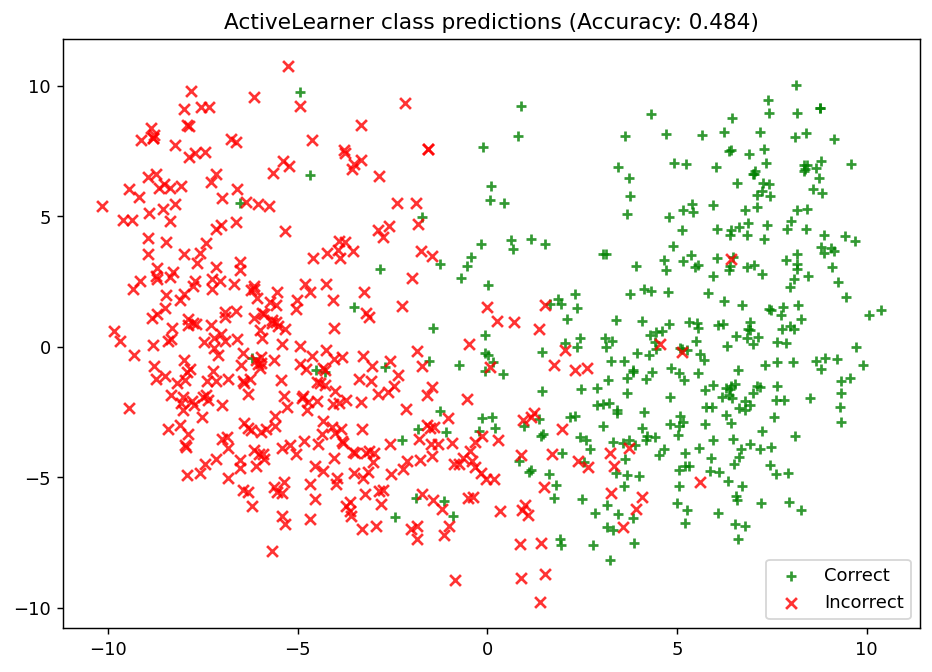

In [ ]:
# Record our learner's score on the raw data.
#unqueried_score = learner.score(X_raw, y_raw)
unqueried_score = metrics.accuracy_score(predictions, y_raw)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()

In [ ]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
query_items = []
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(x_pool)
  query_items.append(query_index)
  # Teach our ActiveLearner model the record it has requested.
  X, y = x_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  print('query_index ', query_index[0], 'data', df['data'][query_index], 'y_pool[query_index]', y_pool[query_index])
  learner.teach(X=X, y=y)

  # Remove the queried instance from the unlabeled pool.
  x_pool, y_pool = np.delete(x_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(x_raw, y_raw)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history.append(model_accuracy)

query_index  466 data 466    Even allowing for poor production values for the time (1971) and the format (some kind of mini-series), this is baaaaaad.  
Name: data, dtype: object y_pool[query_index] [1]
Train on 3 samples
748/748 [==============================] - 0s 476us/sample - loss: 0.6822 - acc: 0.5521
Accuracy after query 1: 0.5521
query_index  261 data 261    This is one I did not have, but I watched it recently on Fox Movie Channel, and was very disappointed.  
Name: data, dtype: object y_pool[query_index] [0]
Train on 4 samples
748/748 [==============================] - 0s 484us/sample - loss: 0.7480 - acc: 0.5160
Accuracy after query 2: 0.5160
query_index  398 data 398    The characters were all funny and had the peculiarity of not having a true lead character.  
Name: data, dtype: object y_pool[query_index] [0]
Train on 5 samples
748/748 [==============================] - 0s 504us/sample - loss: 0.6902 - acc: 0.5936
Accuracy after query 3: 0.5936
query_index  532 data 532  

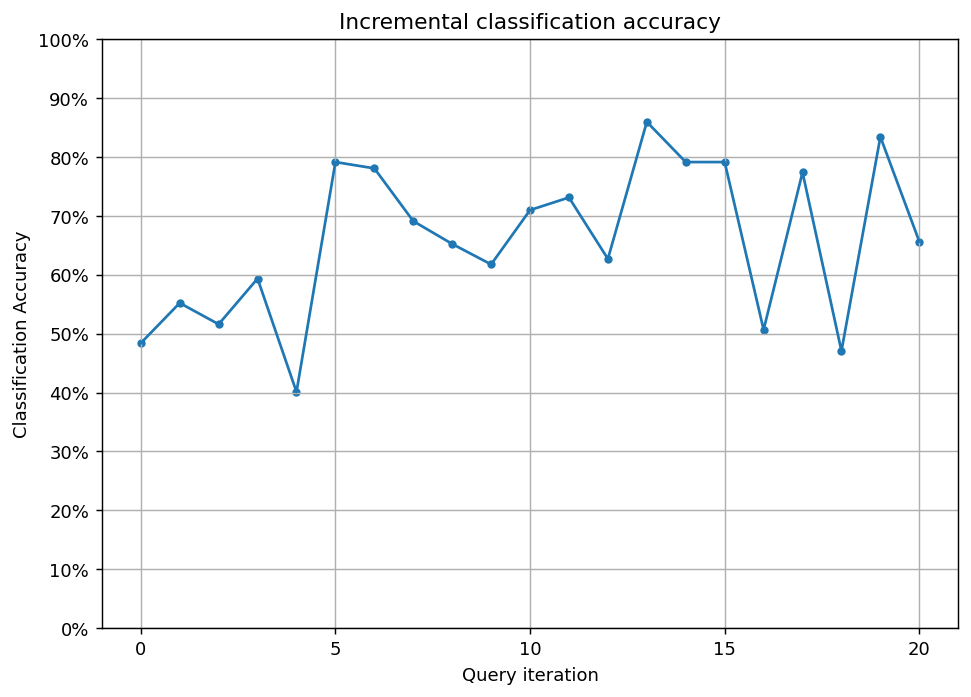

In [ ]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

In [ ]:
query_items_flat =  [item[0] for item in query_items]

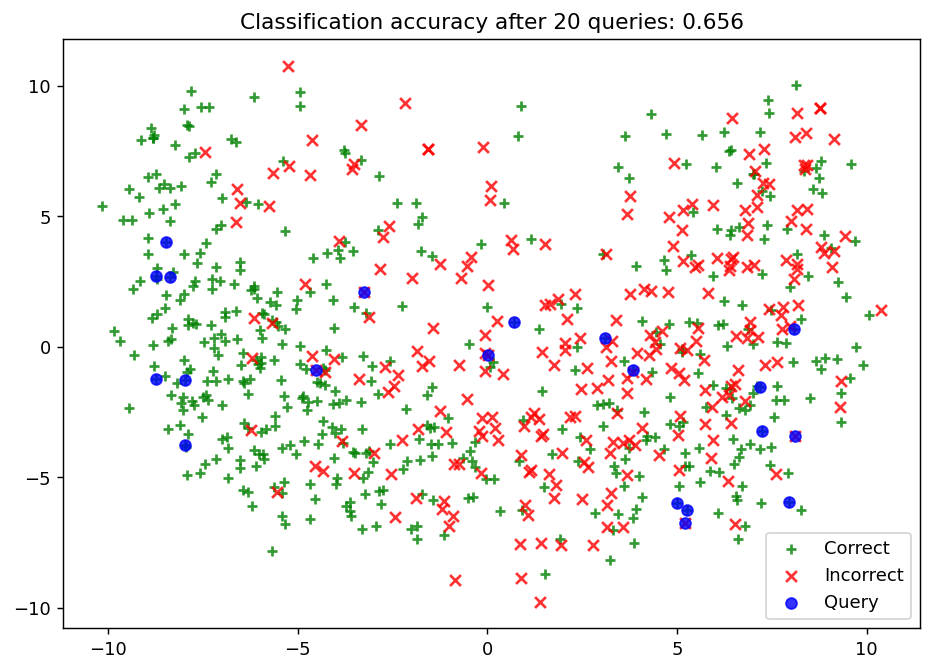

In [ ]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(x_raw)
predictions = [item[0] for item in predictions]
is_correct = (predictions == y_raw)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.scatter(x=x_component[query_items_flat], y=y_component[query_items_flat], c='b', marker='o', label='Query', alpha=8/10)

ax.set_title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=N_QUERIES, final_acc=performance_history[-1]))
ax.legend(loc='lower right')

plt.show()

# Rank Based